<a href="https://colab.research.google.com/github/PradeepKumarM30/WinterSemester2020-21/blob/DeepLearning/20MAI0030EX2/ImageFiltering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd sample_data/

/content/sample_data


# **Add Neccessary Imports**

In [29]:
import numpy as np
import cv2
from skimage.measure.entropy import shannon_entropy
from skimage.filters.rank import entropy
from skimage.morphology import disk
from PIL import Image 
from numpy import asarray
from numpy import asarray
from keras.models import Sequential
from keras.layers import Conv2D
import matplotlib.pyplot as plt
import matplotlib.image as mpimg




# **Q.NO:1 Implement 3X3 filtering(box) on any image of your choice**

# **We First View the original Image**

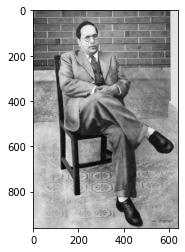

In [30]:

img = mpimg.imread('/content/sample_data/ambedkarimage.jpg')
imgplot = plt.imshow(img)
plt.show()

# **Now applying 3X3 FILTER**

In [31]:
#read image
img_src = cv2.imread('/content/sample_data/ambedkarimage.jpg')

#prepare the 3X3 shaped filter

kernel = np.array([[1, 1, 1], 
                   [1, 1, 1],  
                   [1, 1, 1]])

kernel = kernel/sum(kernel)  #The sum can be avoided , for better output clarity i added it

#filter the source image
img_rst = cv2.filter2D(img_src,-1,kernel)

#save result image
cv2.imwrite('result3X3.jpg',img_rst)

True

# **View the filtered Image**

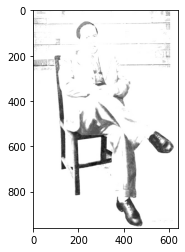

In [32]:
img = mpimg.imread('/content/sample_data/result3X3.jpg')
imgplot = plt.imshow(img)
plt.show()

# **Entropy of 3X3 Filtered Image**

1.839490648780303


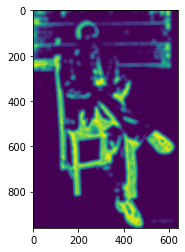

In [33]:
print(shannon_entropy(img_rst[:,:,0])) 

entr_img = entropy(img_rst[:,:,0], disk(10))
plt.imshow(entr_img, cmap='viridis')
plt.show()


# **5X5 filtering on the image**

In [34]:
kernel = np.array([[1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1]])

kernel = kernel/sum(kernel)

#filter the source image
img_rst = cv2.filter2D(img_src,-1,kernel)

#save result image
cv2.imwrite('result5X5.jpg',img_rst)

True

# **View the 5X5 Filtered Image**

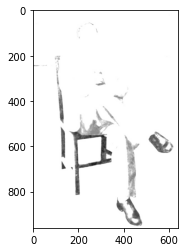

In [35]:
img = mpimg.imread('/content/sample_data/result5X5.jpg')
imgplot = plt.imshow(img)
plt.show()

# **Entropy of 5X5 Filtered Image**

1.058241935518784


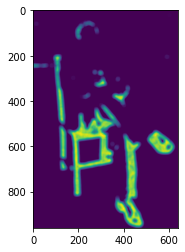

In [36]:
print(shannon_entropy(img_rst[:,:,0])) 

entr_img = entropy(img_rst[:,:,0], disk(10))
plt.imshow(entr_img, cmap='viridis')
plt.show()

# **Q.NO.2 : 3X3 Image Filtering , Stride = 1, Zero Padding**

# **Firstly , Pad the image with slightly thick boreders**

In [38]:
#Pad the images with zeros at the borders
new_img= cv2.copyMakeBorder(img_src,10,10,10,10,cv2.BORDER_CONSTANT,value=0)
cv2.imwrite('borderresult.jpg',new_img)

True

# **A glimpse of bordered Image**

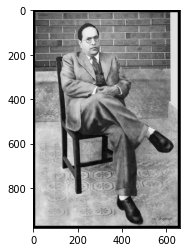

In [39]:
img = mpimg.imread('/content/sample_data/borderresult.jpg')
imgplot = plt.imshow(img)
plt.show()
#We can see a black border indicating the zero padding in the image

# **3X3 Filter on Bordered / Padded image**

In [40]:
#Applying Filter to padded image
img_src = cv2.imread('/content/sample_data/borderresult.jpg')

#prepare the 3X3 shaped filter

kernel = np.array([[1, 1, 1], 
                   [1, 1, 1],  
                   [1, 1, 1]])

kernel = kernel/sum(kernel)

#filter the source image
img_rst = cv2.filter2D(img_src,-1,kernel)

#save result image
cv2.imwrite('result3X3zeropad.jpg',img_rst)

True

# **View Filtered image on padded input**

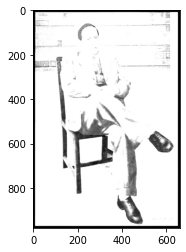

In [41]:
img = mpimg.imread('/content/sample_data/result3X3zeropad.jpg')
imgplot = plt.imshow(img)
plt.show()

# **Entropy of zero padded 3X3 Filtered Image**

2.1155722114237165


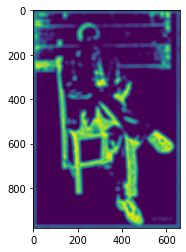

In [42]:
print(shannon_entropy(img_rst[:,:,0])) 

entr_img = entropy(img_rst[:,:,0], disk(10))
plt.imshow(entr_img, cmap='viridis')
plt.show()

# **Now 5X5 Filtering on the zero padded image**

In [43]:
kernel = np.array([[1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1]])

kernel = kernel/sum(kernel)

#filter the source image
img_rst = cv2.filter2D(img_src,-1,kernel)

#save result image
cv2.imwrite('result5X5zeropad.jpg',img_rst)

True

# **View zero padded 5X5 filtered image**

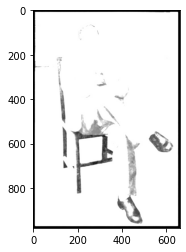

In [44]:
img = mpimg.imread('/content/sample_data/result5X5zeropad.jpg')
imgplot = plt.imshow(img)
plt.show()

# **Entropy of zero padded 5X5 Filtered image**

1.366229693240493


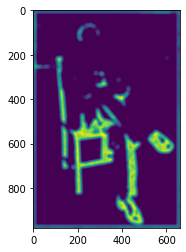

In [45]:
print(shannon_entropy(img_rst[:,:,0])) 

entr_img = entropy(img_rst[:,:,0], disk(10))
plt.imshow(entr_img, cmap='viridis')
plt.show()

# **Q.NO :3 :Image Filtering with stride = 2**

In [46]:
im1 = Image.open(r'/content/sample_data/ambedkarimage.jpg')
im1.save(r'greybr.png')

In [47]:
img = Image.open('greybr.png').convert('L')
img.save('greyscalebr.png')
img_arr = np.array(img) 


# **Applying 3X3 convolutional Filter, stride = 2**

In [66]:
# example of vertical line filter with a stride of 2

# define input data
data = img_arr
data = asarray(data)
data = data.reshape(1, 960, 640, 1)
# create model
model = Sequential()
model.add(Conv2D(1, (3,3), strides=(2, 2), input_shape=(960, 640, 1)))
# summarize model
model.summary()
# define a vertical line detector
detector = [[[[1]],[[1]],[[1]]],
            [[[1]],[[1]],[[1]]],
            [[[1]],[[1]],[[1]]]]
weights = [asarray(detector), asarray([0.0])]
# store the weights in the model
model.set_weights(weights)
# apply filter to input data
yhat = model.predict(data)
# The Yhat contains the ouput data whose
#dimesions are in the ouput


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 479, 319, 1)       10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [64]:
np.reshape(yhat, (479,319))
yhat.shape

(1, 479, 319, 1)

# **Entropy of 3X3 Filtered Image with stride = 2**

In [65]:
print(shannon_entropy(yhat[:,:,0])) 



8.345243066949243


# **5X5 Filtering with stride  = 2**

In [67]:
data = img_arr
data = asarray(data)
data = data.reshape(1, 960, 640, 1)
# create model
model = Sequential()
model.add(Conv2D(1, (5,5), strides=(2, 2), input_shape=(960, 640, 1)))
# summarize model
model.summary()

detector = [[[[1]],[[1]],[[1]],[[1]],[[1]]],
            [[[1]],[[1]],[[1]],[[1]],[[1]]],
            [[[1]],[[1]],[[1]],[[1]],[[1]]],
            [[[1]],[[1]],[[1]],[[1]],[[1]]],
            [[[1]],[[1]],[[1]],[[1]],[[1]]]]
weights = [asarray(detector), asarray([0.0])]
# store the weights in the model
model.set_weights(weights)
# apply filter to input data
yhat = model.predict(data)


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 478, 318, 1)       26        
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


# **Entropy of 5X5 filtered image with stride = 2**

In [68]:
print(shannon_entropy(yhat[:,:,0])) 


8.682186211719282
